In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"A:\my_codes\Machine Learning\Supervised Machine Learning\Regression\Ridge Regression\House Price Prediction\HousingData.csv",encoding='unicode_escape')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
Y = df['MEDV']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [6]:
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train.fillna(X_train.median()), Y_train)

best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)


Best alpha: 0.001


In [7]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])



In [8]:
X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,NaN,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,NaN,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [9]:
Y_train


477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [10]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

array([26.05935825, 38.01162635, 15.32378579, 21.95216959, 14.92425502,
       17.62925382, 17.53479151, 14.84936038, 22.67431279, 19.5242989 ,
       20.15892867, 21.19517447, 10.53274471, 18.1207172 , 18.33703269,
       24.49099077, 19.23395516,  9.41582417, 48.04915121, 12.6111764 ,
       25.2682616 , 28.90526393, 15.20719337, 19.41843749, 16.28273569,
       18.20753306, 18.43561568, 13.26007036, 17.16077744, 19.28107106,
       20.50021938, 24.52310753, 15.1948143 , 24.10157974, 14.67274308,
       17.62488389, 32.43065709, 20.39063505, 20.44978153, 22.62622986,
       17.25314929, 33.16988601, 52.6314136 , 15.94950914, 25.6795696 ,
       15.846051  , 14.65927112, 24.62119426, 18.5711928 , 26.00257686,
       21.86293677, 35.20119571, 17.42614259, 26.41261957, 43.73321681,
       22.71216961, 13.96606941, 33.23301188, 25.48096591, 14.51378128,
       23.28902017, 28.19826748, 30.77121856, 14.11553331, 27.13413945,
       14.6110834 , 14.17032331, 24.84969174, 30.24186491, 11.02

In [11]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,NaN,0.0,0.510,6.416,NaN,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [12]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [13]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(X_test)
print("R²:", r2_score(Y_test, y_pred))

R²: 0.7819499402633299


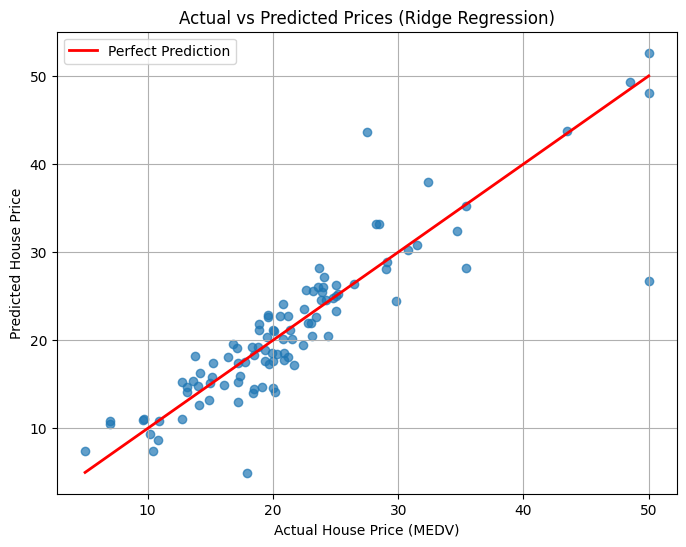

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(Y_test, y_pred, alpha=0.7)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)
plt.xlabel("Actual House Price (MEDV)")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted Prices (Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()